# Introducción a la Programación para Ciencia de Datos
## Lenguaje de programación R
_Rocío Romero Zaliz_ - rocio@decsai.ugr.es

# Input/Output

Supongamos que tenemos un fichero con este contenido:

>12  
2 5  
641

In [3]:
datos <- scan("file.txt")
print(datos)

[1]  12   2   5 641


In [4]:
class(datos)

[1] "numeric"

In [5]:
datos <- scan("file.txt", what=character())
print(datos)
class(datos)

[1] "12"  "2"   "5"   "641"


[1] "character"

In [8]:
datos <- scan("file.txt", sep="\n")
print(datos)

[1]  12  25 641


Podemos usar `scan` para leer desde el teclado si le damos de argumento de entrada una cadena de caracters vacía.

scan("")  
1: 23 4  
3: 2  
4:   
[1] 23  4  2

Marcamos con una línea vacía el final de la lectura de datos.

In [ ]:
scan("") # Does not work in Jupyter

If you want to read in a single line from the keyboard use `readline`:

>readline("Input data: ")  
Input data: 23 4 2  
[1] 23  4  2

In [ ]:
datos <- readline("Input data: ") # Does not work in Jupyter
print(datos)

In [9]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
print(datos)
datos %>% str_split(" ") %>% unlist %>% as.numeric

[1]  12  25 641


[1]  12  25 641

### `cat` vs. `print`

In [16]:
x <- 1:3
print(x^2)
cat(x^2)

[1] 1 4 9
1 4 9

In [12]:
cat(x^2, x, "hola")

1 4 9 1 2 3 hola

In [13]:
vb <- print("hola")
print(vb)

[1] "hola"
[1] "hola"


In [17]:
vb <- cat("hola")
vb

hola

NULL

In [18]:
print(matrix(c(1,5,3,8), nrow = 2))

cat(matrix(c(1,5,3,8), nrow = 2))

     [,1] [,2]
[1,]    1    3
[2,]    5    8
1 5 3 8

In [19]:
cat(x^2, x, "hola", sep="_")

1_4_9_1_2_3_hola

### Leyendo y escribiendo ficheros

Supongamos que tenemos un fichero "matrix.txt" con el siguiente contenido:

> nombre edad  
John 25  
Mary 28  
Jim 19

La primera línea contiene una cabecera (opcional) que indica los nombres de las columnas.

In [20]:
data <- read.table("matrix.txt", header=TRUE)
data

nombre,edad
<chr>,<int>
John,25
Mary,28
Jim,19


In [22]:
data <- read.table("matrix.txt", header=FALSE)
data

V1,V2
<chr>,<chr>
nombre,edad
John,25
Mary,28
Jim,19


In [ ]:
?read.table

In [23]:
scan("matrix.txt", what=character())

[1] "nombre" "edad"   "John"   "25"     "Mary"   "28"     "Jim"    "19"

Si queremos escribir en lugar de leer cambiamos el `read.table` por el `write.table`.

In [24]:
write.table(matrix(1:6, nrow=2), "output1.txt", row.names=TRUE, col.names=TRUE)

In [25]:
write.table(matrix(1:6, nrow=2), "output2.txt", row.names=FALSE, col.names=FALSE)

La función `cat` también puede ser usada para escribir en un fichero...

In [26]:
cat("abc\n", file="u.txt")
cat("de\n", file="u.txt", append=TRUE)

In [27]:
data <- read.csv("matrix.txt", header=TRUE)
data

nombre.edad
<chr>
John 25
Mary 28
Jim 19


## Input/output en Tidyverse

In [28]:
library(tidyverse) # Necesitamos el paquete "readr"
#library(readr)

In [29]:
data <- read_csv("ages.csv", col_names = FALSE)
data

Rows: 3 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2
<chr>,<dbl>
Joe,20
Tom,30
Hyukjin,25


In [30]:
write_csv(data, "clon_ages.csv")

In [32]:
# Leyendo ficheros de Excel
#install.packages("readxl")
library("readxl")

read_excel("results.xlsx")

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`


Tabla 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,Nodes,Train,Test,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000
MNIST,1,4,3190,0.8783,0.8705000000000001,0.1367,0.2271,0.4552,0.5689,0.5516,0.7023,0.6650
MNIST,1,8,6370,0.9274,0.9143,0.1736,0.4643,0.4899,0.4613,0.6985,0.7503,0.6857
MNIST,1,16,12730,0.9726,0.9509,0.6104,0.6676,0.7558,0.8181,0.8179,0.8235,0.7791
MNIST,1,32,25450,0.9871,0.9609,0.5606,0.6782,0.7671,0.7995,0.8648,0.8690,0.8690
MNIST,1,64,50890,0.9951,0.9713000000000001,0.6758,0.7066,0.8524,0.8833,0.8958,0.9232,0.9302
MNIST,1,128,101770,0.9966,0.9743000000000001,0.7833,0.8781,0.8757,0.9442,0.9475,0.9387,0.9148
MNIST,2,4,3210,0.8443000000000001,0.8466,0.0897,0.2974,0.4683,0.5059,0.3286,0.4697,0.6078
MNIST,2,8,6442,0.9331,0.9174,0.1741,0.2533,0.4551,0.4664,0.5745,0.6309,0.7306


In [33]:
read_excel("results.xlsx", col_names = TRUE, skip = 1)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


...1,...2,...3,Nodes,Train,Test,2,3,4,5,6,7,8
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MNIST,1,4,3190,0.8783,0.8705,0.1367,0.2271,0.4552,0.5689,0.5516,0.7023,0.6650
MNIST,1,8,6370,0.9274,0.9143,0.1736,0.4643,0.4899,0.4613,0.6985,0.7503,0.6857
MNIST,1,16,12730,0.9726,0.9509,0.6104,0.6676,0.7558,0.8181,0.8179,0.8235,0.7791
MNIST,1,32,25450,0.9871,0.9609,0.5606,0.6782,0.7671,0.7995,0.8648,0.8690,0.8690
MNIST,1,64,50890,0.9951,0.9713,0.6758,0.7066,0.8524,0.8833,0.8958,0.9232,0.9302
MNIST,1,128,101770,0.9966,0.9743,0.7833,0.8781,0.8757,0.9442,0.9475,0.9387,0.9148
MNIST,2,4,3210,0.8443,0.8466,0.0897,0.2974,0.4683,0.5059,0.3286,0.4697,0.6078
MNIST,2,8,6442,0.9331,0.9174,0.1741,0.2533,0.4551,0.4664,0.5745,0.6309,0.7306
MNIST,2,16,13002,0.9654,0.9449,0.4304,0.4563,0.7193,0.7792,0.7891,0.8414,0.8582


In [ ]:
?read_excel

In [34]:
read_excel("results.xlsx", sheet = "Fashion MNIST Non-convolutional", col_names = TRUE, skip = 1)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


...1,...2,...3,Nodes,Train,Test,2,3,4,5,6,7,8
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fashion MNIST,1,4,3190,0.8385,0.8149,0.2898,0.4202,0.5323,0.5775,0.6492,0.5986,0.6139
Fashion MNIST,1,8,6370,0.8734,0.8440,0.3988,0.5780,0.6824,0.7096,0.6675,0.6691,0.7479
Fashion MNIST,1,16,12730,0.8911,0.8544,0.3787,0.5922,0.6602,0.7190,0.7187,0.7893,0.7467
Fashion MNIST,1,32,25450,0.9038,0.8579,0.6079,0.6076,0.6933,0.7173,0.7473,0.7769,0.7738
Fashion MNIST,1,64,50890,0.9128,0.8696,0.6433,0.7607,0.7878,0.7669,0.7947,0.7945,0.8173
Fashion MNIST,1,128,101770,0.9191,0.8693,0.6456,0.7844,0.8274,0.8405,0.8318,0.8561,0.8499
Fashion MNIST,2,4,3210,0.7944,0.7867,0.3205,0.2245,0.1861,0.4701,0.4811,0.6769,0.5635
Fashion MNIST,2,8,6442,0.8697,0.8282,0.1720,0.4982,0.6273,0.5814,0.6469,0.6893,0.6996
Fashion MNIST,2,16,13002,0.8889,0.8583,0.2512,0.5933,0.6172,0.6964,0.7467,0.7193,0.7749


In [35]:
read_excel("results.xlsx", n_max = 3, sheet = 2, col_names = TRUE, skip = 1)

New names:
• `` -> `...1`


...1,x,i,j,k,Nodes,Train,Test,2,3,4,5,6,7,8
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MNIST,1,8,2,4,5542,0.9662,0.9474,0.1152,0.5113,0.6171,0.5766,0.6997,0.8856,0.7970
MNIST,1,8,2,8,10994,0.9904,0.9746,0.1471,0.5025,0.5114,0.8394,0.6847,0.8205,0.9161
MNIST,1,8,2,16,21898,0.9940,0.9776,0.1651,0.5801,0.5181,0.5092,0.8469,0.8794,0.8614


In [36]:
read_excel("results.xlsx", range = cell_cols("B:D"), col_names = TRUE, skip = 1)

New names:
• `` -> `...1`
• `` -> `...2`


...1,...2,Nodes
<dbl>,<dbl>,<dbl>
1,4,3190
1,8,6370
1,16,12730
1,32,25450
1,64,50890
1,128,101770
2,4,3210
2,8,6442
2,16,13002


In [37]:
read_excel("results.xlsx", range = "C1:E4", col_names = TRUE, skip = 1)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


...1,...2,...3
<dbl>,<chr>,<chr>
NA,Nodes,Train
4,3190,0.8783
8,6370,0.9274


In [39]:
#install.packages("writexl")
library("writexl")

write_xlsx(data, "results_out.xlsx")

In [40]:
write_xlsx(list(pag1=data, pag2=data), "results_out.xlsx") # Listas para varias solapas...

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


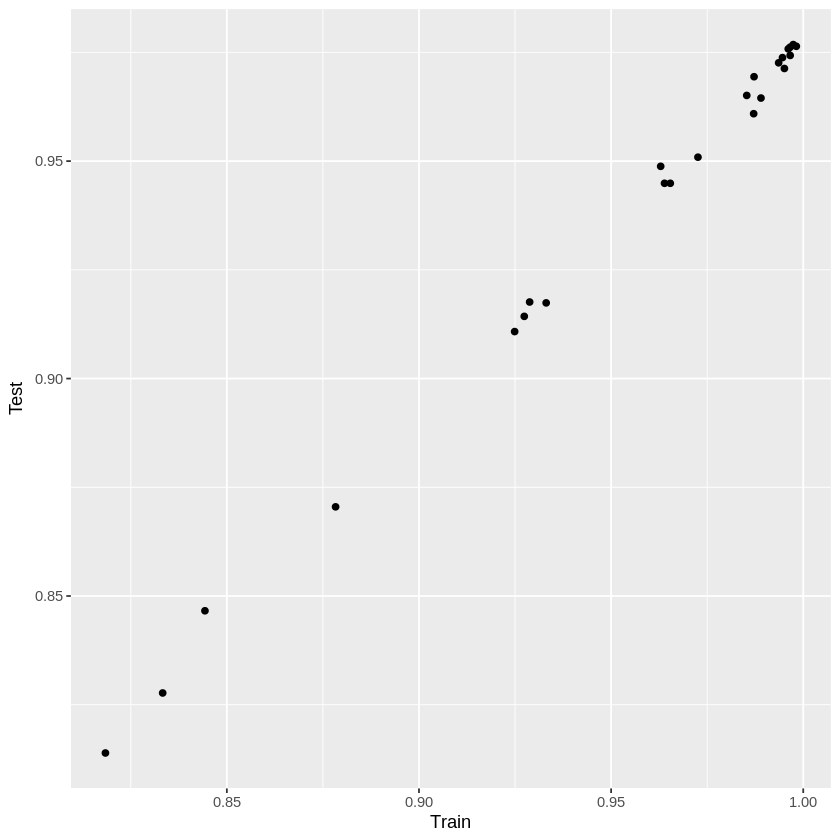

In [41]:
read_xlsx("results.xlsx", sheet=1, col_names = TRUE, skip = 1) %>%
    ggplot(aes(x=Train,y=Test)) + geom_point()

## Ejercicios input/output
1. Pida al usuario que introduzca con el teclado una cadena de caracteres s y un número n e imprima en pantalla n veces la cadena s (sin espacios entre palabras) tal como se ve en el ejemplo (notar que no hay un [1] al principio...).
>s="hola", n=3<br/>
holaholahola
2. Crea tres ficheros llamados `dos.txt`, `tres.txt` y `cinco.txt` que contengan la tabla de 2, 3 y 5 respectivamente (sólo incluye los 10 primeros valores de cada uno, un número en una línea separada, SOLO el número, nada más).
3. Escribe las cinco primeras filas de la matriz creada en el último ejercicio en un nuevo fichero llamado `prime.txt` y las cinco últimas en otro fichero llamado `fin.txt`. Ambos ficheros deben tener los datos separados por comas.
4. Dados dos números, f y c (dados por el usuario mediante el teclado), cree una figura cuadrada de f filas y c columnas con el carácter "x" (sin espacios). Vea a continuación un ejemplo para f=4 y c=3 (notar que no hay espacios en blanco ni [1,] ni cosas raras...):
> xxx<br/>
 xxx<br/>
 xxx<br/>
 xxx<br/>
5. Cargue la primer y tercera hojas del fichero `resultados.xls` y muestre un gráfico que compare, para los dos datasets, el resultado en entrenamiento y test a medida que aumenta la cantidad de bits utilizados. 